In [1]:
#Librariries needed

# Data manipulation 
import pandas as pd
import numpy as np
import re

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects 
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from random import randint

# preprocessing and resampling
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline

# metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix, f1_score,accuracy_score, precision_score, recall_score, roc_auc_score 

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import RandomizedSearchCV


import warnings
warnings.filterwarnings("ignore")

# ML model
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
#from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

import sklearn
import researchpy as rp

ModuleNotFoundError: No module named 'yellowbrick'

In [125]:
data=pd.read_csv("C:/Users/hadar/Desktop/Final/data.csv")

In [126]:
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [127]:
#Removal of spaces in variable names
lista_new_col = []
for col in data.columns:
  col = re.sub(' ', '_', col)
  col = re.sub('-', '_', col)
  lista_new_col.append(col)
data.columns = lista_new_col

print ( 'Shape of dataset:', data.shape )

Shape of dataset: (6819, 96)


In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1   _ROA(C)_before_interest_and_depreciation_before_interest  6819 non-null   float64
 2   _ROA(A)_before_interest_and_%_after_tax                   6819 non-null   float64
 3   _ROA(B)_before_interest_and_depreciation_after_tax        6819 non-null   float64
 4   _Operating_Gross_Margin                                   6819 non-null   float64
 5   _Realized_Sales_Gross_Margin                              6819 non-null   float64
 6   _Operating_Profit_Rate                                    6819 non-null   float64
 7   _Pre_tax_net_Interest_Rate                                6819 non-null   float64
 8   _After_tax_net_Int

In [129]:
colors = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap',
          'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 
          'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 
          'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 
          'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 
          'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 
          'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 
          'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 
          'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 
          'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 
          'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 
          'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 
          'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 
          'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 
          'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 
          'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 
          'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

# EXPLORATORY ANALYSIS OF THE DATABASE

In [130]:
#Missing values checking
data.isna().any().sum()

0

In [131]:
#Identifying variable types
numeric_features = data.dtypes[data.dtypes != 'int64'].index
categorical_features = data.dtypes[data.dtypes == 'int64'].index

data[categorical_features].columns.tolist()

['Bankrupt?', '_Liability_Assets_Flag', '_Net_Income_Flag']

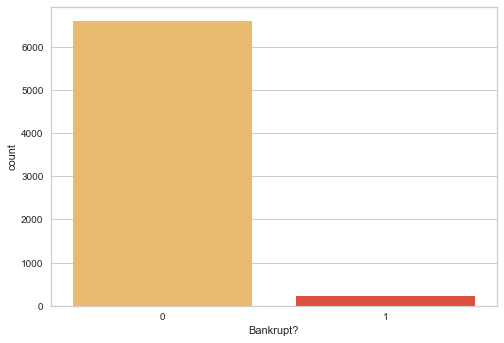

In [132]:
#Analyse univariée
value = randint(0, len(colors)-1)

sns.countplot('Bankrupt?',data=data,palette = colors[value])
plt.savefig('unibankrupty.png')

In [133]:
rp.summary_cat(data['Bankrupt?'])

,Variable,Outcome,Count,Percent
0,Bankrupt?,0,6599,96.77
1,,1,220,3.23


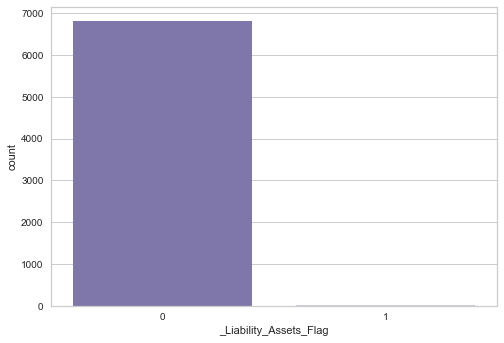

In [134]:
value = randint(0, len(colors)-1)

sns.countplot('_Liability_Assets_Flag',data=data,palette = colors[value])
plt.savefig('uniliabilility.png')

In [135]:
rp.summary_cat(data['_Liability_Assets_Flag'])

,Variable,Outcome,Count,Percent
0,_Liability_Assets_Flag,0,6811,99.88
1,,1,8,0.12


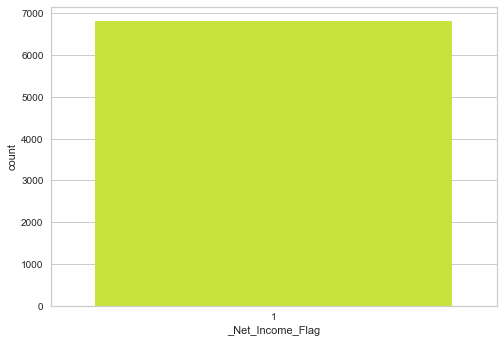

In [136]:
value = randint(0, len(colors)-1)

sns.countplot('_Net_Income_Flag',data=data,palette = colors[value])
plt.savefig('uninetcomeinflag.png')

In [137]:
rp.summary_cat(data['_Net_Income_Flag'])

,Variable,Outcome,Count,Percent
0,_Net_Income_Flag,1,6819,100.0


In [138]:
# Correlation analysis between the 6 most positively correlated variables and the 6 most negatively correlated with the dependent variable
numeric_features = data.dtypes[data.dtypes != 'int64'].index
categorical_features = data.dtypes[data.dtypes == 'int64'].index
positive_corr = data[numeric_features].corrwith(data["Bankrupt?"]).sort_values(ascending=False)[:6].index.tolist()
negative_corr = data[numeric_features].corrwith(data["Bankrupt?"]).sort_values()[:6].index.tolist()                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

positive_corr = data[positive_corr + ["Bankrupt?"]].copy()
negative_corr = data[negative_corr + ["Bankrupt?"]].copy()

In [139]:
def corrbargraph(x_value, y_value):
    
    plt.figure(figsize=(15,8))
   

    for i in range(1,7):
        plt.subplot(2,3,i)  
        sns.barplot(x = x_value, y = y_value[i-1],data = data)

    plt.tight_layout(pad=0.5)

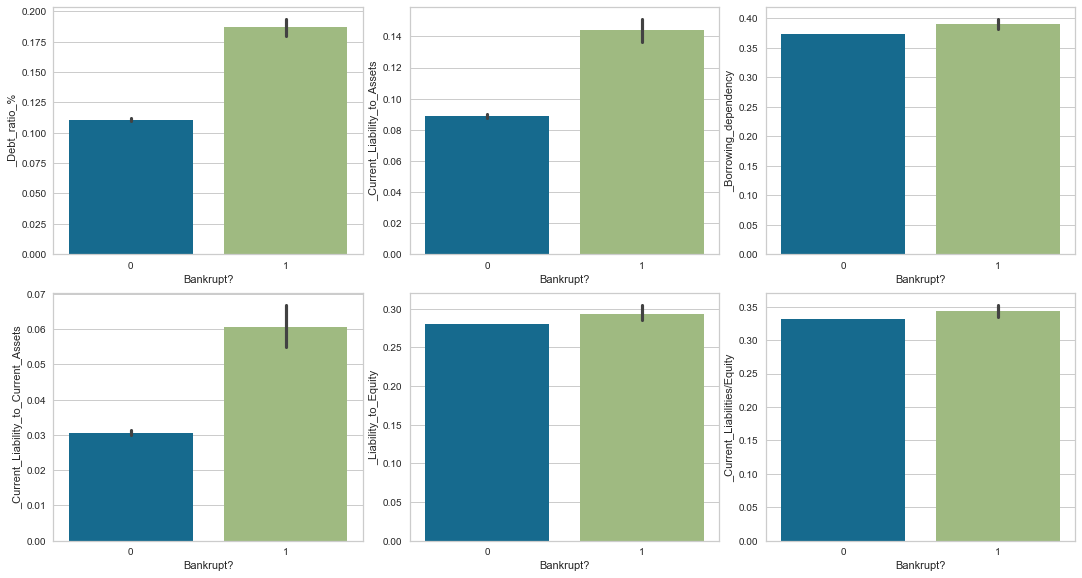

In [140]:
from random import randint
x_value = positive_corr.columns.tolist()[-1]
y_value = positive_corr.columns.tolist()[:-1]

corrbargraph(x_value, y_value)
plt.savefig('poscorr.png')

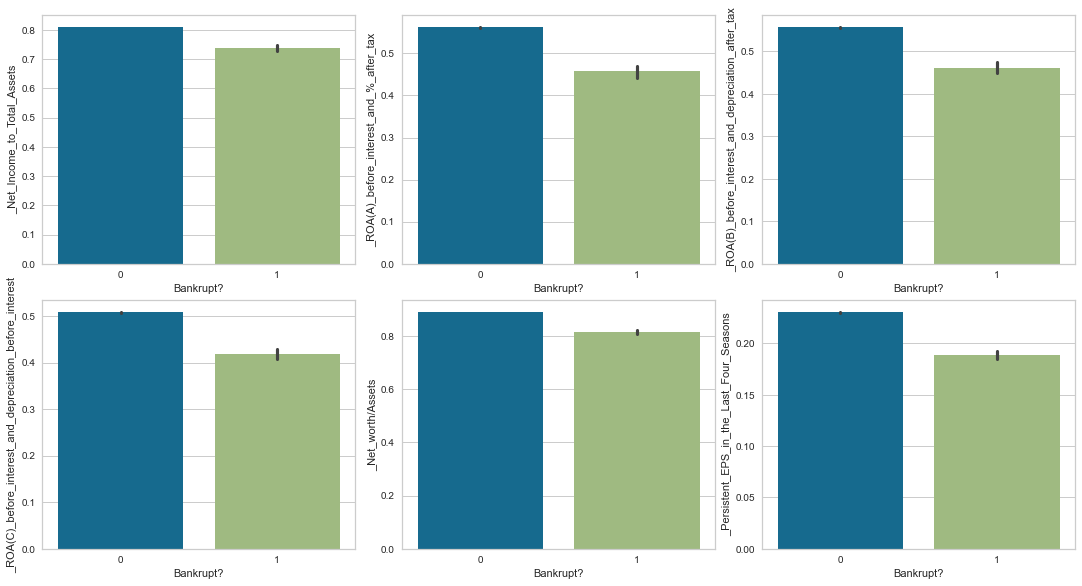

In [141]:
x_value = negative_corr.columns.tolist()[-1]
y_value = negative_corr.columns.tolist()[:-1]

corrbargraph(x_value, y_value)
plt.savefig('negcorr.png')

In [142]:
#corelation matrix
data.corr()

,Bankrupt?,_ROA(C)_before_interest_and_depreciation_before_interest,_ROA(A)_before_interest_and_%_after_tax,_ROA(B)_before_interest_and_depreciation_after_tax,_Operating_Gross_Margin,_Realized_Sales_Gross_Margin,_Operating_Profit_Rate,_Pre_tax_net_Interest_Rate,_After_tax_net_Interest_Rate,_Non_industry_income_and_expenditure/revenue,...,_Net_Income_to_Total_Assets,_Total_assets_to_GNP_price,_No_credit_Interval,_Gross_Profit_to_Sales,_Net_Income_to_Stockholder's_Equity,_Liability_to_Equity,_Degree_of_Financial_Leverage_(DFL),_Interest_Coverage_Ratio_(Interest_expense_to_EBIT),_Net_Income_Flag,_Equity_to_Liability
Bankrupt?,1.000000,-0.260807,-0.282941,-0.273051,-0.100043,-0.099445,-0.000230,-0.008517,-0.008857,-0.016593,...,-0.315457,0.035104,-0.005547,-0.100044,-0.180987,0.166812,0.010508,-0.005509,NaN,-0.083048
_ROA(C)_before_interest_and_depreciation_before_interest,-0.260807,1.000000,0.940124,0.986849,0.334719,0.332755,0.035725,0.053419,0.049222,0.020501,...,0.887670,-0.071725,0.008135,0.334721,0.274287,-0.143629,-0.016575,0.010573,NaN,0.052416
_ROA(A)_before_interest_and_%_after_tax,-0.282941,0.940124,1.000000,0.955741,0.326969,0.324956,0.032053,0.053518,0.049474,0.029649,...,0.961552,-0.098900,0.011463,0.326971,0.291744,-0.141039,-0.011515,0.013372,NaN,0.057887
_ROA(B)_before_interest_and_depreciation_after_tax,-0.273051,0.986849,0.955741,1.000000,0.333749,0.331755,0.035212,0.053726,0.049952,0.022366,...,0.912040,-0.089088,0.007523,0.333750,0.280617,-0.142838,-0.014663,0.011473,NaN,0.056430
_Operating_Gross_Margin,-0.100043,0.334719,0.326969,0.333749,1.000000,0.999518,0.005745,0.032493,0.027175,0.051438,...,0.300143,0.022672,0.004205,1.000000,0.075304,-0.085434,-0.011806,-0.001167,NaN,0.120029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
_Liability_to_Equity,0.166812,-0.143629,-0.141039,-0.142838,-0.085434,-0.085407,0.001541,-0.004043,-0.004390,-0.011899,...,-0.159697,0.021982,-0.003724,-0.085434,-0.791836,1.000000,0.002119,0.001487,NaN,-0.159654
_Degree_of_Financial_Leverage_(DFL),0.010508,-0.016575,-0.011515,-0.014663,-0.011806,-0.011268,0.000935,0.000855,0.000927,-0.000556,...,-0.010463,-0.001881,-0.008812,-0.011806,-0.000093,0.002119,1.000000,0.016513,NaN,-0.016739
_Interest_Coverage_Ratio_(Interest_expense_to_EBIT),-0.005509,0.010573,0.013372,0.011473,-0.001167,-0.001158,0.000393,0.000984,0.000957,0.001024,...,0.012746,0.000239,0.001027,-0.001169,0.005147,0.001487,0.016513,1.000000,NaN,-0.008339
_Net_Income_Flag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


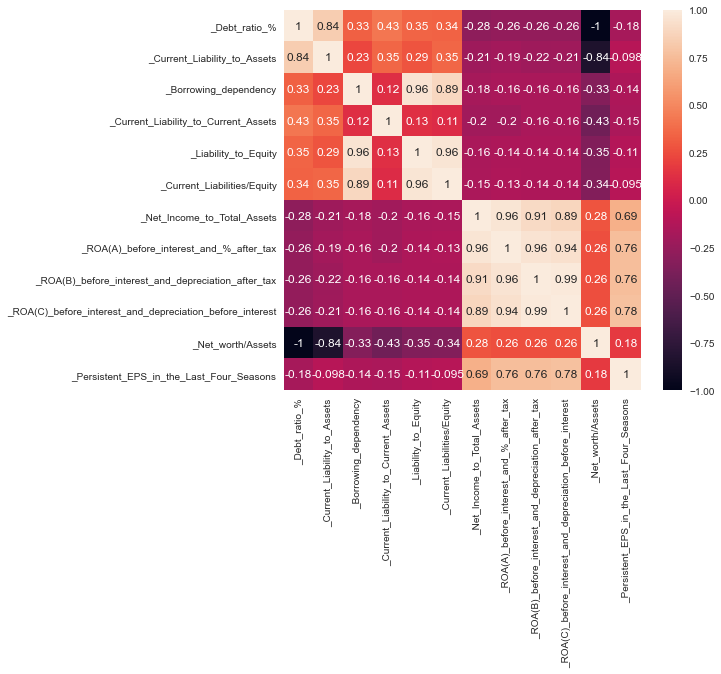

In [143]:
#Matrice de correlation entre les  variables explicatives précédentes  
relation = positive_corr.columns.tolist()[:-1] + negative_corr.columns.tolist()[:-1]
plt.figure(figsize=(8,7))
sns.heatmap(data[relation].corr(),annot=True)
plt.savefig('corrmatrix.png')

In [144]:
df=data.drop(['_Net_worth/Assets','_Net_Income_Flag','_Liability_Assets_Flag'],1,inplace=True)


In [145]:
df=data

array([[<AxesSubplot:title={'center':'Bankrupt?'}>,
        <AxesSubplot:title={'center':'_ROA(C)_before_interest_and_depreciation_before_interest'}>,
        <AxesSubplot:title={'center':'_ROA(A)_before_interest_and_%_after_tax'}>,
        <AxesSubplot:title={'center':'_ROA(B)_before_interest_and_depreciation_after_tax'}>,
        <AxesSubplot:title={'center':'_Operating_Gross_Margin'}>,
        <AxesSubplot:title={'center':'_Realized_Sales_Gross_Margin'}>,
        <AxesSubplot:title={'center':'_Operating_Profit_Rate'}>,
        <AxesSubplot:title={'center':'_Pre_tax_net_Interest_Rate'}>,
        <AxesSubplot:title={'center':'_After_tax_net_Interest_Rate'}>,
        <AxesSubplot:title={'center':'_Non_industry_income_and_expenditure/revenue'}>],
       [<AxesSubplot:title={'center':'_Continuous_interest_rate_(after_tax)'}>,
        <AxesSubplot:title={'center':'_Operating_Expense_Rate'}>,
        <AxesSubplot:title={'center':'_Research_and_development_expense_rate'}>,
        <AxesSubp

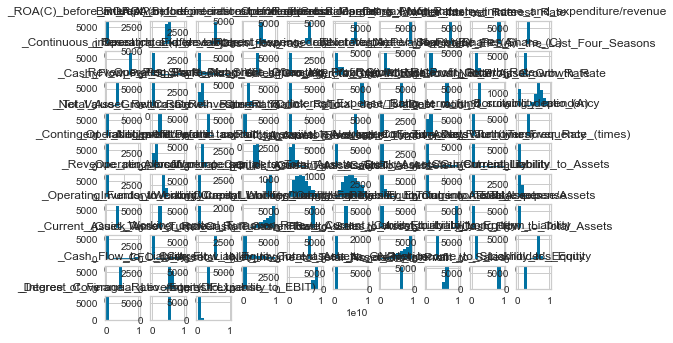

In [146]:
#Checking features distribution
df.hist()

In [147]:
df=data

In [148]:
df.head()

,Bankrupt?,_ROA(C)_before_interest_and_depreciation_before_interest,_ROA(A)_before_interest_and_%_after_tax,_ROA(B)_before_interest_and_depreciation_after_tax,_Operating_Gross_Margin,_Realized_Sales_Gross_Margin,_Operating_Profit_Rate,_Pre_tax_net_Interest_Rate,_After_tax_net_Interest_Rate,_Non_industry_income_and_expenditure/revenue,...,_Current_Liability_to_Current_Assets,_Net_Income_to_Total_Assets,_Total_assets_to_GNP_price,_No_credit_Interval,_Gross_Profit_to_Sales,_Net_Income_to_Stockholder's_Equity,_Liability_to_Equity,_Degree_of_Financial_Leverage_(DFL),_Interest_Coverage_Ratio_(Interest_expense_to_EBIT),_Equity_to_Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.118250,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.047775,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.025346,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.067250,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.047725,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,0.035490


In [149]:
# Separation of the dependent variable from the explanatory variables
X = df.drop('Bankrupt?', axis=1)
y = df['Bankrupt?']


# PCA

In [150]:
#Normalisation of variables for PCA
sc = StandardScaler()
X = sc.fit_transform(X)
X = pd.DataFrame(X)

In [151]:
from sklearn.decomposition import PCA
acp = PCA(svd_solver='full')
coord = acp.fit_transform(X)
print(acp.explained_variance_)

[1.23460869e+01 6.54233931e+00 4.62304884e+00 4.27190311e+00
 3.97872181e+00 2.88664732e+00 2.86615253e+00 2.67782253e+00
 2.57951833e+00 1.96107811e+00 1.88754959e+00 1.86086179e+00
 1.68126555e+00 1.50335449e+00 1.47737848e+00 1.41957659e+00
 1.31264366e+00 1.28682742e+00 1.22659382e+00 1.18265702e+00
 1.14871582e+00 1.07895039e+00 1.06940229e+00 1.04267640e+00
 1.04195929e+00 1.02112023e+00 1.01072466e+00 1.00743611e+00
 1.00511012e+00 9.84658022e-01 9.73085346e-01 9.65034057e-01
 9.57101936e-01 9.50133438e-01 9.30913983e-01 9.18459236e-01
 9.08695958e-01 9.02897871e-01 8.76475509e-01 8.50636045e-01
 8.42670711e-01 8.27074556e-01 8.01266719e-01 7.94970476e-01
 7.52589638e-01 7.15762810e-01 6.74848255e-01 6.32834349e-01
 5.85846764e-01 5.41689673e-01 5.39862810e-01 4.88592511e-01
 4.82561330e-01 4.40998438e-01 4.19921957e-01 4.07462344e-01
 3.63155140e-01 3.25646726e-01 2.76145252e-01 2.50234246e-01
 2.15348821e-01 2.12703253e-01 1.68841321e-01 1.63577353e-01
 1.58296087e-01 1.411416

In [152]:
p = X.shape[1]
n = X.shape[0]

In [153]:
eigval=(n-1)/n*acp.explained_variance_
print(acp.explained_variance_ratio_)

[1.34176917e-01 7.11019553e-02 5.02431616e-02 4.64269200e-02
 4.32406340e-02 3.13719999e-02 3.11492631e-02 2.91024981e-02
 2.80341309e-02 2.13129405e-02 2.05138346e-02 2.02237923e-02
 1.82719455e-02 1.63384133e-02 1.60561068e-02 1.54279175e-02
 1.42657735e-02 1.39852034e-02 1.33305863e-02 1.28530824e-02
 1.24842104e-02 1.17260017e-02 1.16222333e-02 1.13317771e-02
 1.13239836e-02 1.10975052e-02 1.09845265e-02 1.09487866e-02
 1.09235078e-02 1.07012350e-02 1.05754635e-02 1.04879623e-02
 1.04017563e-02 1.03260229e-02 1.01171464e-02 9.98178853e-03
 9.87568150e-03 9.81266807e-03 9.52551059e-03 9.24468805e-03
 9.15812103e-03 8.98862246e-03 8.70814363e-03 8.63971624e-03
 8.17912252e-03 7.77888961e-03 7.33423140e-03 6.87762548e-03
 6.36696576e-03 5.88706777e-03 5.86721348e-03 5.31000934e-03
 5.24446264e-03 4.79275833e-03 4.56369974e-03 4.42828902e-03
 3.94675961e-03 3.53911924e-03 3.00113864e-03 2.71953858e-03
 2.34040479e-03 2.31165282e-03 1.83496262e-03 1.77775396e-03
 1.72035731e-03 1.533923

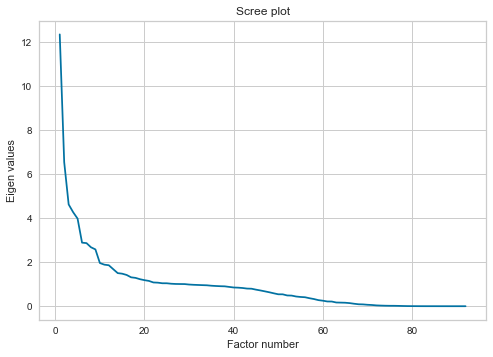

<Figure size 576x396 with 0 Axes>

In [154]:
plt.plot(np.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()
plt.savefig('ncpcp1.png')

In [155]:
np.cumsum(acp.explained_variance_ratio_)[60]

0.9845914310152982

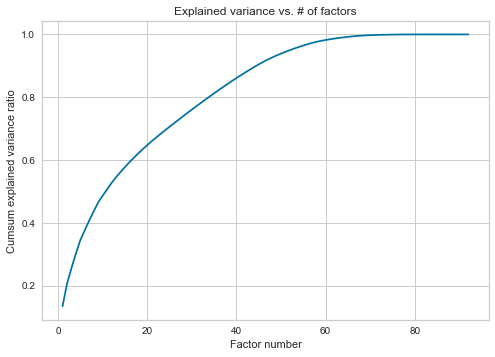

<Figure size 576x396 with 0 Axes>

In [156]:
plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()
plt.savefig('ncpcp2.png')

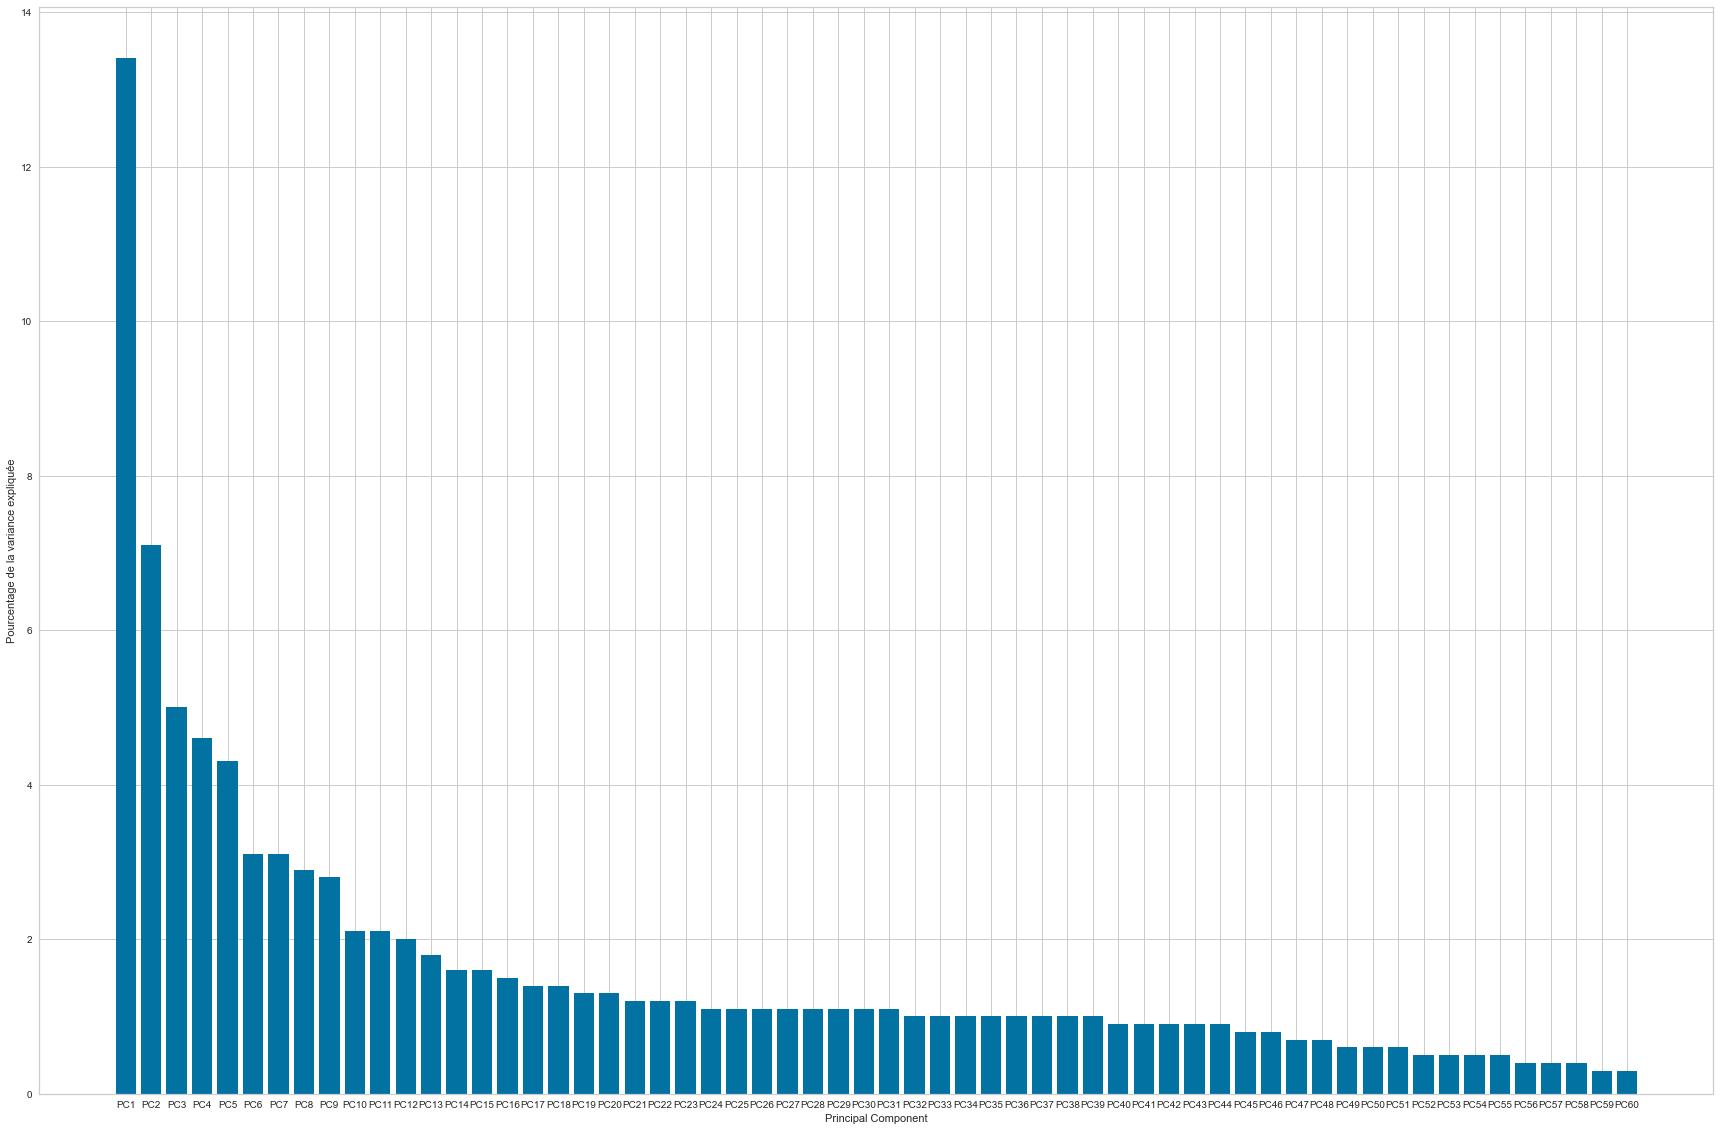

In [157]:
# creation of the object PCA
pca = PCA(n_components=60)
pca.fit(X)
#pca_data = pca.transform(X) # get PCA coordinates for scaled_data
coord = pca.fit_transform(X)


per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1) #percentage of variation which each PC represents
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
plt.figure(figsize=(30,20))

plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Pourcentage de la variance expliquée')
plt.xlabel('Principal Component')
plt.title('')
plt.show()

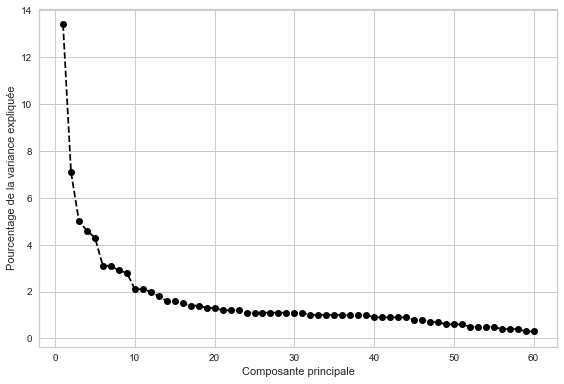

In [158]:
plt.plot(range(1,len(per_var)+1),per_var, linestyle='--',
              marker='o', color='black')
plt.ylabel("Pourcentage de la variance expliquée")
plt.xlabel("Composante principale")
plt.title("")
plt.tight_layout()
plt.show()

In [159]:
coord=pd.DataFrame(coord)
coord

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,-7.142736,0.313878,0.799538,-0.532452,-0.154848,0.489563,0.764043,-0.932025,1.456832,2.079107,...,-0.362001,0.451126,0.445048,-0.324567,-0.504621,-0.222474,0.430441,-1.532457,0.059927,0.646248
1,-2.602464,-1.138844,3.117385,-0.969018,-0.820636,-0.306121,0.254237,-0.776524,1.006720,0.911312,...,-0.320366,0.442851,-0.012091,0.085026,-0.096545,-0.024479,-0.402494,-0.473287,0.249017,-0.013901
2,-4.118170,-0.602315,0.684315,-0.211198,-0.305634,-0.680451,-0.129009,0.255318,0.118473,1.779588,...,0.225539,-0.137357,-0.844440,0.376306,0.402752,-0.197893,0.384272,0.354787,0.566135,0.107218
3,-5.810914,-1.332390,2.085549,-1.329349,-0.775160,1.275101,-0.365105,-0.724661,-0.082643,0.220518,...,0.887732,-0.105714,-1.215669,-0.495287,0.221475,-0.159264,0.371862,-0.050188,-0.215869,-0.276483
4,-2.368943,-0.145984,-0.459063,-1.324026,-0.298059,0.768830,-0.227731,-0.646723,0.074407,-0.838146,...,0.099190,-0.488488,-0.113207,-0.145385,0.239115,-0.080114,0.349836,0.228518,-0.268393,-0.131009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,-1.172636,-0.511161,-0.268137,0.172310,-0.051979,-0.086608,-0.006771,-0.032619,-0.241579,-0.184016,...,-0.332123,-0.388507,-0.081623,0.028413,0.164958,0.006754,0.125861,0.298477,-0.124526,-0.258818
6815,-1.341075,-0.594390,-0.133830,-0.683372,-0.287208,-0.301029,-0.197482,0.203758,-0.566620,-0.755722,...,0.747600,-0.053828,-0.052963,-0.268915,-0.031095,-0.238370,-0.189886,-0.184941,-0.361478,-0.265860
6816,1.666106,-1.402151,0.772275,1.124989,0.112731,-1.418912,-0.356845,1.973768,-1.712648,0.786225,...,0.133209,0.956311,-0.026992,-0.322717,-0.210315,-0.089766,-1.023137,-0.167819,-0.007308,-0.086587
6817,1.785297,-0.343352,0.181735,0.908438,0.099915,0.819996,-0.255987,-0.587913,-0.993718,0.205957,...,-0.029040,-0.438913,-0.205587,0.028212,0.024452,0.135165,0.341382,0.347835,-0.229577,0.020809


In [160]:
coord.columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30','PC31','PC32','PC33','PC34','PC35','PC36','PC37','PC38','PC39','PC40','PC41','PC42','PC43','PC44','PC45','PC46','PC47','PC48','PC49','PC50','PC51','PC52','PC53','PC54','PC55','PC56','PC57','PC58','PC59','PC60']

In [161]:
coord

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60
0,-7.142736,0.313878,0.799538,-0.532452,-0.154848,0.489563,0.764043,-0.932025,1.456832,2.079107,...,-0.362001,0.451126,0.445048,-0.324567,-0.504621,-0.222474,0.430441,-1.532457,0.059927,0.646248
1,-2.602464,-1.138844,3.117385,-0.969018,-0.820636,-0.306121,0.254237,-0.776524,1.006720,0.911312,...,-0.320366,0.442851,-0.012091,0.085026,-0.096545,-0.024479,-0.402494,-0.473287,0.249017,-0.013901
2,-4.118170,-0.602315,0.684315,-0.211198,-0.305634,-0.680451,-0.129009,0.255318,0.118473,1.779588,...,0.225539,-0.137357,-0.844440,0.376306,0.402752,-0.197893,0.384272,0.354787,0.566135,0.107218
3,-5.810914,-1.332390,2.085549,-1.329349,-0.775160,1.275101,-0.365105,-0.724661,-0.082643,0.220518,...,0.887732,-0.105714,-1.215669,-0.495287,0.221475,-0.159264,0.371862,-0.050188,-0.215869,-0.276483
4,-2.368943,-0.145984,-0.459063,-1.324026,-0.298059,0.768830,-0.227731,-0.646723,0.074407,-0.838146,...,0.099190,-0.488488,-0.113207,-0.145385,0.239115,-0.080114,0.349836,0.228518,-0.268393,-0.131009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,-1.172636,-0.511161,-0.268137,0.172310,-0.051979,-0.086608,-0.006771,-0.032619,-0.241579,-0.184016,...,-0.332123,-0.388507,-0.081623,0.028413,0.164958,0.006754,0.125861,0.298477,-0.124526,-0.258818
6815,-1.341075,-0.594390,-0.133830,-0.683372,-0.287208,-0.301029,-0.197482,0.203758,-0.566620,-0.755722,...,0.747600,-0.053828,-0.052963,-0.268915,-0.031095,-0.238370,-0.189886,-0.184941,-0.361478,-0.265860
6816,1.666106,-1.402151,0.772275,1.124989,0.112731,-1.418912,-0.356845,1.973768,-1.712648,0.786225,...,0.133209,0.956311,-0.026992,-0.322717,-0.210315,-0.089766,-1.023137,-0.167819,-0.007308,-0.086587
6817,1.785297,-0.343352,0.181735,0.908438,0.099915,0.819996,-0.255987,-0.587913,-0.993718,0.205957,...,-0.029040,-0.438913,-0.205587,0.028212,0.024452,0.135165,0.341382,0.347835,-0.229577,0.020809


In [162]:
# smote  Resampling
    #Traditional split of the dataset 80% - 20%
    coord_train, coord_test, y_train, y_test = train_test_split(coord, y, test_size=0.2, random_state=42)
    
    coord_train, coord_test, y_train, y_test = coord_train.values, coord_test.values, y_train.values, y_test.values

    #Proportional split of 80% data with respect to the class of the target feature ie. [1,0]
    sf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

    for train_index, test_index in sf.split(coord_train, y_train):
        sf_coord_train, sf_coord_test = coord.iloc[train_index], coord.iloc[test_index]
        sf_y_train, sf_y_test = y.iloc[train_index], y.iloc[test_index]

    sf_coord_train, sf_coord_test, sf_y_train, sf_y_test = sf_coord_train.values, sf_coord_test.values, sf_y_train.values, sf_y_test.values
    
    sm = SMOTE(sampling_strategy='minority', random_state=42)
    coordsm_train, ycsm_train = sm.fit_resample(sf_coord_train, sf_y_train)


In [163]:
coordsm_train.shape

(8366, 60)

# logistic regression based on PCA

In [164]:
#logistic regression based on PCA
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
import statsmodels.api as sm
logit_model=sm.Probit(ycsm_train,coordsm_train)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.357005
         Iterations: 35
                        Results: Probit
Model:              Probit           Pseudo R-squared: 0.485    
Dependent Variable: y                AIC:              6093.4036
Date:               2022-01-16 18:40 BIC:              6515.3195
No. Observations:   8366             Log-Likelihood:   -2986.7  
Df Model:           59               LL-Null:          -5798.9  
Df Residuals:       8306             LLR p-value:      0.0000   
Converged:          0.0000           Scale:            1.0000   
No. Iterations:     35.0000                                     
-----------------------------------------------------------------
          Coef.    Std.Err.     z      P>|z|    [0.025    0.975] 
-----------------------------------------------------------------
x1        -0.6190    0.0226  -27.3652  0.0000   -0.6633   -0.5747
x2         0.3469    0.0467    7.4292  0.0000    0.2554    0.4384
x3         0.0635    0.0351    1.8079  0.070

In [165]:
logreg.fit(coordsm_train, ycsm_train)


LogisticRegression()

In [166]:
#confusion matrix 
y_pred = logreg.predict(coord_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1165,  148],
       [  11,   40]], dtype=int64)

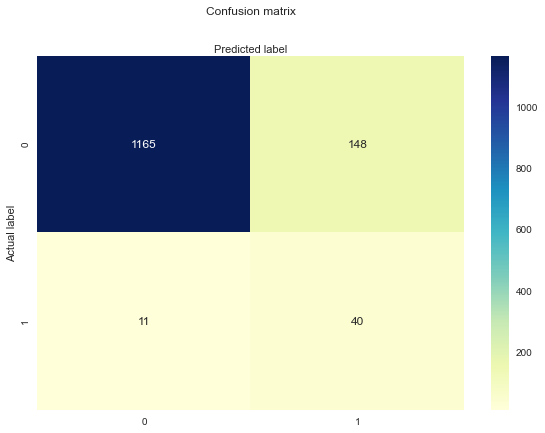

In [167]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('cmlogacp.png')

In [168]:
#Model evaluation by some scores
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1313
           1       0.21      0.78      0.33        51

    accuracy                           0.88      1364
   macro avg       0.60      0.84      0.64      1364
weighted avg       0.96      0.88      0.91      1364



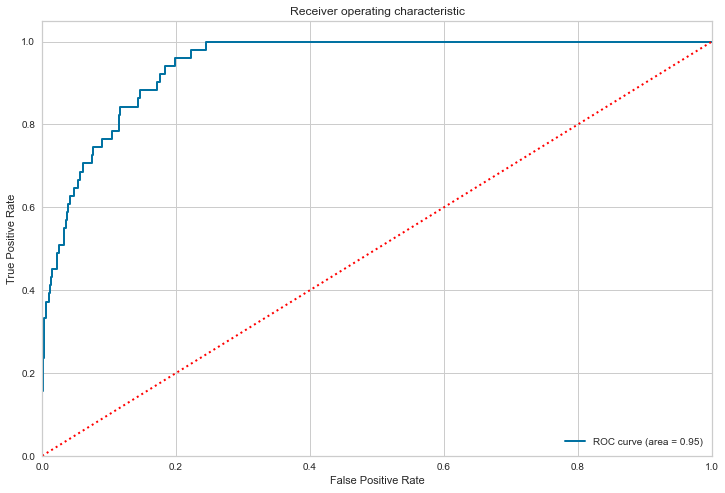

<Figure size 576x396 with 0 Axes>

In [169]:
#Roc curve
y_pred_proba = logreg.predict_proba(coord_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,lw=2, label='ROC curve (area = %0.2f)' %auc)
plt.legend(loc=4)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='dotted')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
plt.savefig('roclogacp.png')

In [170]:
X

,0,1,2,3,4,5,6,7,8,9,...,82,83,84,85,86,87,88,89,90,91
0,-2.217909,-2.045798,-2.400361,-0.383334,-0.382638,0.016456,-0.023516,-0.020165,-0.087479,-0.031281,...,2.812493,-2.254317,-0.049491,-0.084274,-0.383465,-0.861611,0.680171,-0.060031,-0.098978,-0.622067
1,-0.673828,-0.311068,-0.598450,0.135068,0.136307,0.014671,0.014799,0.015966,-0.005957,0.009823,...,0.527485,-0.309033,-0.049491,-0.021388,0.135253,-0.029804,0.240685,15.129816,0.364559,-0.535573
2,-1.303672,-0.908420,-1.319910,-0.383759,-0.388177,0.007858,-0.061111,-0.051183,-0.142238,-0.086566,...,-0.199721,-0.820510,-0.049491,-0.005984,-0.383698,-0.249820,0.679247,-0.062961,-0.125015,-0.621960
3,-1.735886,-1.636209,-1.556340,-1.441418,-1.441832,-0.004257,-0.017313,-0.008676,-0.024491,-0.011077,...,1.158899,-1.691222,-0.049491,-0.080226,-1.441526,-0.392864,0.093765,-0.053903,-0.052562,-0.471826
4,-0.661778,-0.307745,-0.508050,-0.541238,-0.540708,0.016758,0.013703,0.016186,-0.013254,0.013300,...,0.525867,-0.316008,-0.049491,-0.032052,-0.541255,-0.029564,-0.128014,-0.178037,0.776395,-0.241715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,-0.189395,-0.291959,-0.168181,-0.206277,-0.204969,0.018215,0.017036,0.018197,-0.010092,0.016277,...,-0.115286,-0.194231,-0.049491,-0.024011,-0.206217,-0.002968,-0.052524,-0.030437,0.063215,-0.353693
6815,-0.494676,-0.310237,-0.477627,-0.569328,-0.568828,0.018223,0.017455,0.017919,-0.009248,0.016145,...,-0.001180,-0.198659,-0.049491,0.001317,-0.569333,-0.006633,-0.154404,-0.033992,0.049970,-0.185856
6816,-0.534845,-0.379194,-0.534996,0.147411,0.135029,0.017628,0.016412,0.017153,-0.009919,0.013012,...,-0.776979,-0.247517,-0.049491,0.019653,0.147305,-0.018166,-0.316446,-0.047870,-0.015101,1.001206
6817,0.017875,0.019594,0.007403,-0.005811,-0.004720,0.024494,0.024099,0.023223,-0.011175,0.022233,...,-0.278510,0.100366,-0.049491,0.003493,-0.005931,0.046934,-0.194852,-0.045898,-0.004270,-0.071364


In [171]:
#SMOTE RESAMPLING
    #Traditional split of the dataset 80% - 20%
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    X_train, X_test, y_train, y_test = X_train.values, X_test.values, y_train.values, y_test.values

    #Proportional split of 80% data with respect to the class of the target feature ie. [1,0]
    sf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

    for train_index, test_index in sf.split(X_train, y_train):
        sf_X_train, sf_X_test = X.iloc[train_index], X.iloc[test_index]
        sf_y_train, sf_y_test = y.iloc[train_index], y.iloc[test_index]

    sf_X_train, sf_X_test, sf_y_train, sf_y_test = sf_X_train.values, sf_X_test.values, sf_y_train.values, sf_y_test.values
    
    sm = SMOTE(sampling_strategy='minority', random_state=42)
    Xsm_train, ysm_train = sm.fit_resample(sf_X_train, sf_y_train)

In [172]:
Xsm_train.shape

(8366, 92)

# logistic regression based on LASSO

In [173]:
#Model fiting
lasso = LogisticRegression(penalty='l1', C=0.01, solver='liblinear')   
lasso.fit(Xsm_train, ysm_train)

LogisticRegression(C=0.01, penalty='l1', solver='liblinear')

In [174]:
#Prediction
y_lasso = lasso.predict(X_test)
y_lasso

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [175]:
#Confusion matrix
cnf_matrix_lasso = metrics.confusion_matrix(y_test, y_lasso)
cnf_matrix_lasso

array([[1134,  179],
       [   6,   45]], dtype=int64)

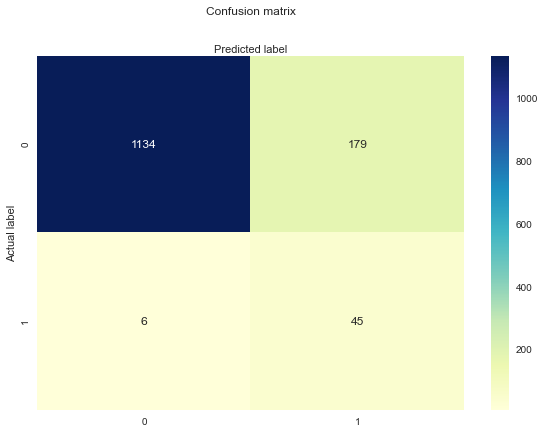

In [176]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_lasso), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('cmloglasso.png')

In [177]:
#Model evaluation by some scores
print(classification_report(y_test, y_lasso))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      1313
           1       0.20      0.88      0.33        51

    accuracy                           0.86      1364
   macro avg       0.60      0.87      0.63      1364
weighted avg       0.97      0.86      0.90      1364



# logistic regression based on RIDGE

In [178]:
#Model fiting
ridge = LogisticRegression(penalty='l2', C=0.1)   # l1 = Lasso / l2 = Ridge. 
ridge.fit(Xsm_train, ysm_train)

LogisticRegression(C=0.1)

In [179]:
#Predictions
y_ridge = ridge.predict(X_test)
y_ridge

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [180]:
#Confusion matrix
cnf_matrix_ridge = metrics.confusion_matrix(y_test, y_ridge)
cnf_matrix_ridge

array([[1171,  142],
       [   8,   43]], dtype=int64)

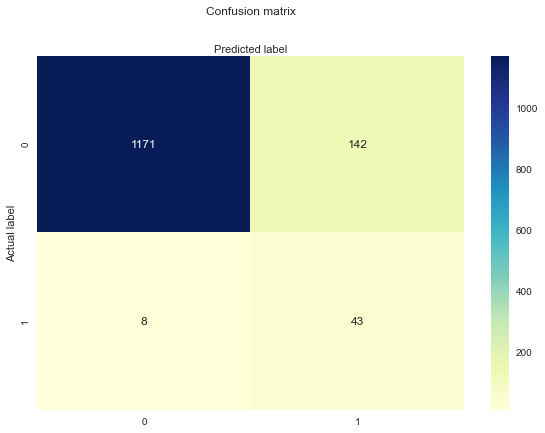

In [181]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_ridge), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('cmlogridge.png')

In [182]:
# Model evaluation by some scores
print(classification_report(y_test, y_ridge))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1313
           1       0.23      0.84      0.36        51

    accuracy                           0.89      1364
   macro avg       0.61      0.87      0.65      1364
weighted avg       0.96      0.89      0.92      1364



# logistic regression based on ELASTICNET

In [183]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(penalty='l1', solver='liblinear')
log.fit(X, y)

LogisticRegression(penalty='l1', solver='liblinear')

In [184]:
classifier = LogisticRegression(penalty='l1', solver = 'saga', multi_class="auto", max_iter=1000, random_state=3)
classifier.fit(Xsm_train, ysm_train)
y_en = classifier.predict(X_test)

In [185]:
from sklearn.feature_selection import SelectFromModel
sel=SelectFromModel(LogisticRegression(penalty='l1',C=0.05,solver='liblinear'))
sel.fit(Xsm_train,ysm_train)
sel.get_support()

array([ True, False, False, False,  True, False, False, False, False,
       False, False, False,  True,  True,  True, False, False, False,
        True,  True, False,  True, False,  True, False, False,  True,
       False,  True, False, False,  True, False,  True,  True,  True,
        True, False,  True, False,  True, False,  True, False,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
       False, False,  True,  True, False, False, False,  True, False,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True, False, False, False,  True,  True,
       False, False])

In [186]:
# features importances
sel.estimator_.coef_

array([[-4.20520427e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.12115297e-02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -6.44954900e-02, -1.83914225e-03, -1.16576480e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -1.93378325e+00, -1.24316893e-01,  0.00000000e+00,
         5.03311035e-01,  0.00000000e+00,  7.80929044e-04,
         0.00000000e+00,  0.00000000e+00,  1.32045280e-01,
         0.00000000e+00,  6.44920843e-02,  0.00000000e+00,
         0.00000000e+00,  1.71611151e-01,  0.00000000e+00,
        -2.09842410e-02, -1.75683129e-02,  1.48703574e-01,
         1.81325418e+00,  0.00000000e+00,  2.39004171e-01,
         0.00000000e+00,  5.17430834e-02,  0.00000000e+00,
        -3.59152432e-01,  0.00000000e+00, -3.46672877e-01,
        -4.34668944e-02, -2.27175102e-02,  5.75664119e-02,
        -7.63516637e-01,  2.37159310e-02,  0.00000000e+0

In [187]:
#confusion matrix
cnf_matrix_en = metrics.confusion_matrix(y_test, y_en)
cnf_matrix_en

array([[1170,  143],
       [   9,   42]], dtype=int64)

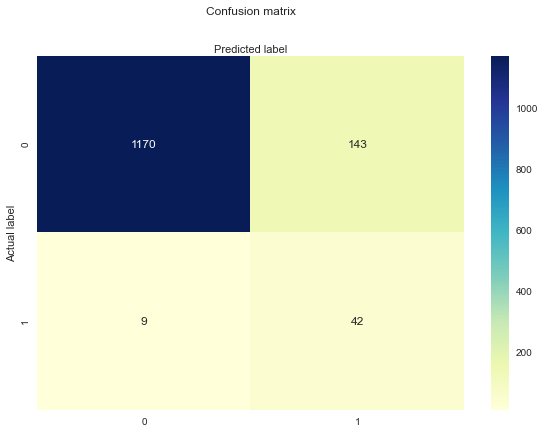

In [188]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_en), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('cmlogen.png')

In [189]:
#Model evaluation by some scores
print(classification_report(y_test, y_en))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1313
           1       0.23      0.82      0.36        51

    accuracy                           0.89      1364
   macro avg       0.61      0.86      0.65      1364
weighted avg       0.96      0.89      0.92      1364



# Support Vector Machine

In [190]:
modelSvc=SVC()

In [191]:
modelSvc

SVC()

In [192]:
# set the best parameters of svm classifier
from sklearn.model_selection import GridSearchCV
parameters = {'C': [0.001, 0.01, 1, 10, 100],  
              'gamma': [1000, 1,  0.1, 0.01, 0.001], 
              'kernel': ['rbf','linear','sigmoid','poly']} 
grid=GridSearchCV(modelSvc,parameters,verbose=1,cv=2,n_jobs=-1)
grid.fit(Xsm_train,ysm_train)

Fitting 2 folds for each of 100 candidates, totalling 200 fits


GridSearchCV(cv=2, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 1, 10, 100],
                         'gamma': [1000, 1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear', 'sigmoid', 'poly']},
             verbose=1)

In [193]:
# print the best parameters of the svm classifier
print("Best Parameters of knn is:\n",grid.best_params_)

Best Parameters of knn is:
 {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [194]:
svm_model=SVC(C=10,kernel='rbf',gamma=0.1,class_weight=None, probability=True)

In [195]:
# Learning the svm classifier

svm_model.fit(Xsm_train, ysm_train)

SVC(C=10, gamma=0.1, probability=True)

In [196]:
# make prediction with the test 

ysvm_pred = svm_model.predict(X_test)

In [197]:
# print the confusion matrix
svc_matrix = metrics.confusion_matrix(y_test, ysvm_pred)
svc_matrix

array([[1307,    6],
       [  10,   41]], dtype=int64)

In [198]:
# print the classification report to show the accuracy, recall and precision 
print(classification_report(y_test, ysvm_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1313
           1       0.87      0.80      0.84        51

    accuracy                           0.99      1364
   macro avg       0.93      0.90      0.92      1364
weighted avg       0.99      0.99      0.99      1364



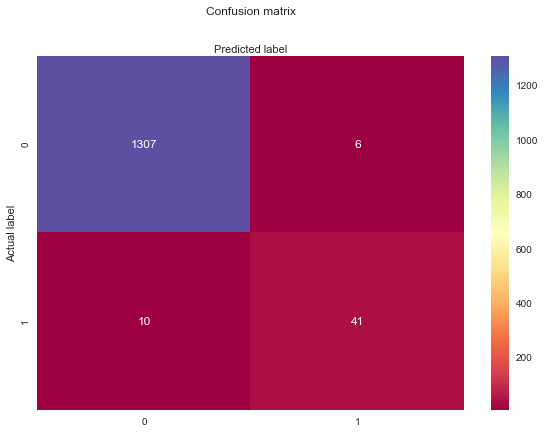

In [199]:
# plot the confusion matrix 

class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


sns.heatmap(pd.DataFrame(svc_matrix), annot=True, cmap="Spectral" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('cmsvm.png')

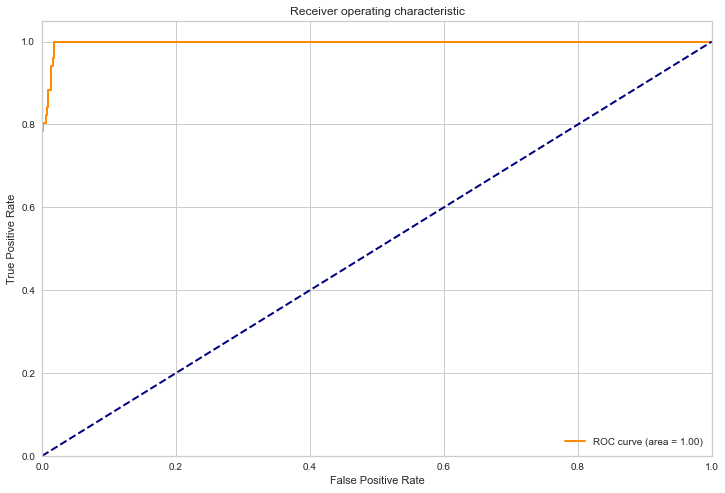

<Figure size 576x396 with 0 Axes>

In [200]:
# plot the  ROC curve 

ysvmpred_proba = svm_model.predict_proba(X_test)[::,1]
fpr, tpr,_= metrics.roc_curve(y_test,  ysvmpred_proba)
auc = metrics.roc_auc_score(y_test, ysvmpred_proba)
plt.figure(figsize=(12,8))

lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' %auc)
plt.legend(loc=4)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
plt.savefig('rocsvm.png')

# K-NEAREST NEIGHBORS

In [201]:
from sklearn.neighbors import KNeighborsClassifier # import the package to make knn model

# set the best parameters of Knn 
parameters = {'n_neighbors':np.arange(3,10),'weights':['uniform', 'distance'],
          'metric':['minkowski','manhattan','chebyshev'] }



In [202]:
knn = KNeighborsClassifier()

In [203]:
# import the package GridSearchCV
from sklearn.model_selection import GridSearchCV
# set the model with parameters 
knn_cv = GridSearchCV(knn, param_grid=parameters, cv=5)

In [204]:
# fit the learning knn model
knn_cv.fit(Xsm_train,ysm_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'manhattan', 'chebyshev'],
                         'n_neighbors': array([3, 4, 5, 6, 7, 8, 9]),
                         'weights': ['uniform', 'distance']})

In [205]:
# find the best parameters 
print("Best Parameters of knn is:\n",knn_cv.best_params_)

Best Parameters of knn is:
 {'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'uniform'}


In [206]:
# put the best parameters in knn model 
knn_1 = KNeighborsClassifier(n_neighbors=4, weights='uniform', algorithm='auto', 
                           leaf_size=30, p=1, metric='manhattan', metric_params=None, n_jobs=-1)

In [207]:
# learning model with best parameters
knn_1.fit(Xsm_train,ysm_train)

KNeighborsClassifier(metric='manhattan', n_jobs=-1, n_neighbors=4, p=1)

In [208]:
# make prediction
yknn_pred = knn_1.predict(X_test)

In [209]:
# make the classification report 
print(classification_report(y_test, yknn_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1313
           1       0.39      0.98      0.56        51

    accuracy                           0.94      1364
   macro avg       0.69      0.96      0.76      1364
weighted avg       0.98      0.94      0.95      1364



In [210]:
# print confusion matrix 
knn_matrix = metrics.confusion_matrix(y_test, yknn_pred)
knn_matrix

array([[1234,   79],
       [   1,   50]], dtype=int64)

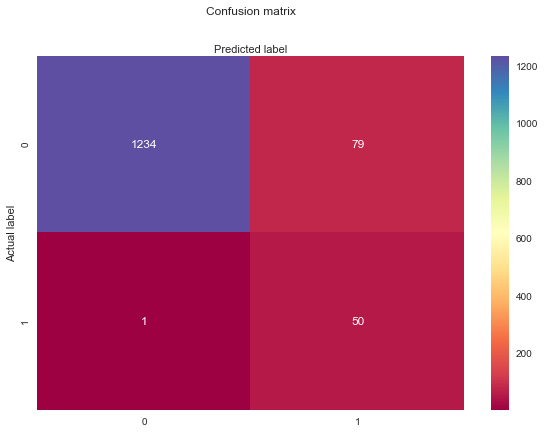

In [211]:
# plot the matrix confusion 

class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(knn_matrix), annot=True, cmap="Spectral" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('cmknn.png')

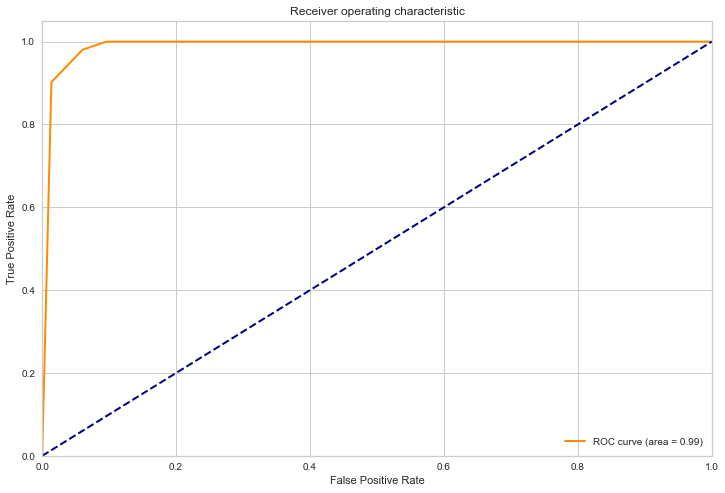

<Figure size 576x396 with 0 Axes>

In [212]:
#plot the roc curve
yknn_pred_proba = knn_1.predict_proba(X_test)[::,1]
fpr, tpr,_= metrics.roc_curve(y_test,  yknn_pred_proba)
auc = metrics.roc_auc_score(y_test, yknn_pred_proba)
plt.figure(figsize=(12,8))

lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' %auc)
plt.legend(loc=4)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
plt.savefig('rocknn.png')

# RANDOM FOREST

In [213]:
%%time
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
def run_randomForest(Xsm_train, X_test, ysm_train, y_test):
    clf = RandomForestClassifier(n_estimators=500,random_state=0, n_jobs=-1)
    clf = clf.fit(Xsm_train, ysm_train)
    yrf_pred = clf.predict(X_test)
    print('Accuracy: {:.3f}'.format(accuracy_score(y_test, yrf_pred)))
run_randomForest(Xsm_train, X_test, ysm_train, y_test)

Accuracy: 0.988
Wall time: 4.66 s


In [214]:
%%time
from sklearn.ensemble import RandomForestClassifier
# definition of parameters
forest = RandomForestClassifier(n_estimators=500,
criterion='gini', max_depth=None,
min_samples_split=2, min_samples_leaf=1,
max_features='auto', max_leaf_nodes=None,
bootstrap=True, oob_score=True)
# Training
forest = forest.fit(Xsm_train,ysm_train)
print(1-forest.oob_score_)
# prevision error on the test
1-forest.score(X_test,y_test)

0.019125029882859246
Wall time: 23.9 s


0.010997067448680342

In [215]:
%%time
from sklearn.model_selection import GridSearchCV
param=[{"max_features":list(range(4,92,2))}]
digit_rf= GridSearchCV(RandomForestClassifier(n_estimators=100,criterion='gini', max_depth=None,
min_samples_split=2, min_samples_leaf=1,
 max_leaf_nodes=None,
bootstrap=True, oob_score=True),param,cv=5,n_jobs=-1)
digit_rf=digit_rf.fit(Xsm_train, ysm_train)
# optimal parameter
digit_rf.best_params_


Wall time: 18min 58s


{'max_features': 26}

In [216]:
digit_rf.best_params_.get('max_features')

26

In [217]:
forest = RandomForestClassifier(n_estimators=500,
criterion='gini', max_depth=None,
min_samples_split=2, min_samples_leaf=1,
max_features=digit_rf.best_params_.get('max_features'), max_leaf_nodes=None,
bootstrap=True, oob_score=True)
# Training
forest = forest.fit(Xsm_train,ysm_train)
print(1-forest.oob_score_)
# prevision error on the test
1-forest.score(X_test,y_test)
# prediction
y_chap = forest.predict(X_test)

0.019364092756394946


In [218]:
# make the classification report 
print(classification_report(y_test, y_chap))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1313
           1       0.80      0.92      0.85        51

    accuracy                           0.99      1364
   macro avg       0.90      0.96      0.92      1364
weighted avg       0.99      0.99      0.99      1364



In [219]:
rf_matrix = metrics.confusion_matrix(y_test, y_chap)
rf_matrix

array([[1301,   12],
       [   4,   47]], dtype=int64)

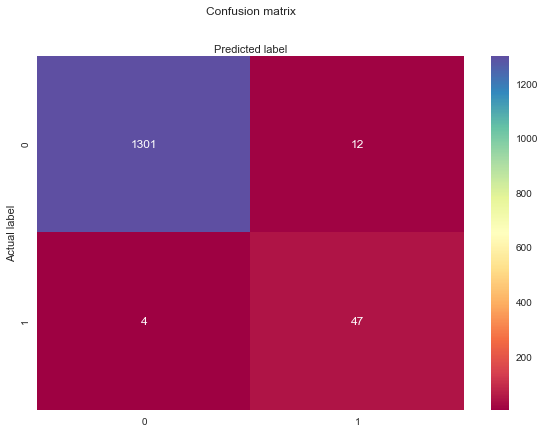

In [220]:
# plot the matrix confusion 

class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(rf_matrix), annot=True, cmap="Spectral" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('cmrf.png')

In [221]:
y_chap1 = forest.predict_proba(X_test)

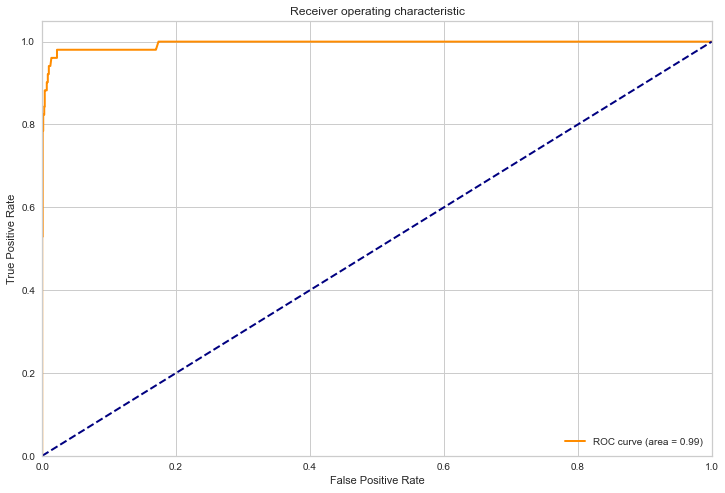

<Figure size 576x396 with 0 Axes>

In [222]:
#plot the ROC curve
y_chap1 = forest.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_chap1)
auc = metrics.roc_auc_score(y_test, y_chap1)
plt.figure(figsize=(12,8))
#plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' %auc)
plt.legend(loc=4)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
plt.savefig('rocrf.png')

In [223]:
Xsm_train=pd.DataFrame(Xsm_train)

In [224]:
#features selection
selected_feat= Xsm_train.columns[(sel.get_support())]
selected_feat

Int64Index([ 0,  4, 12, 13, 14, 18, 19, 21, 23, 26, 28, 31, 33, 34, 35, 36, 38,
            40, 42, 44, 45, 46, 47, 48, 49, 53, 55, 56, 57, 60, 61, 62, 65, 66,
            70, 72, 73, 74, 75, 76, 77, 79, 81, 82, 83, 84, 88, 89],
           dtype='int64')

In [225]:
pip install tabulate


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\racha\anaconda3\python.exe -m pip install --upgrade pip' command.


In [226]:
#features importances
from tabulate import tabulate
headers = ["name", "score"]
values = sorted(zip(selected_feat, forest.feature_importances_), key=lambda x: x[1] * -1)
print(tabulate(values, headers, tablefmt="plain"))

  name        score
    26  0.113993
    42  0.108481
    75  0.101223
    23  0.0511514
    21  0.0372745
    73  0.0325117
    70  0.0260569
    79  0.0170725
    47  0.0124247
    76  0.0115461
    57  0.0110666
    19  0.0100348
    31  0.00956615
    12  0.00939322
     0  0.00931907
    18  0.00635313
    82  0.00628642
    56  0.00557757
     4  0.0053749
    89  0.00517344
    33  0.00497579
    13  0.00466372
    61  0.00464274
    48  0.00463261
    14  0.00453724
    36  0.00450942
    49  0.00440927
    74  0.00439633
    38  0.00434784
    88  0.0041587
    40  0.00392344
    55  0.00377489
    46  0.00366449
    53  0.0036594
    62  0.00353439
    44  0.0035302
    81  0.0032113
    77  0.00313849
    28  0.00312894
    35  0.00260785
    72  0.00107074
    83  0.000536132
    84  1.69362e-05
    34  1.01048e-05
    66  6.76422e-06
    60  1.55234e-06
    45  0
    65  0


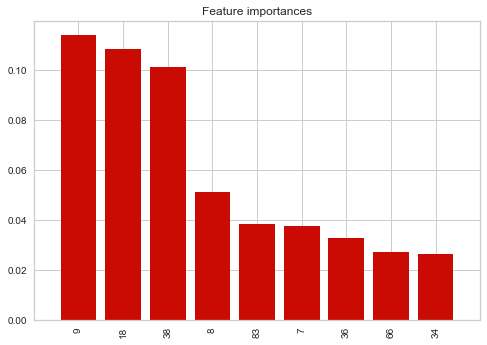

In [227]:
all(forest.feature_importances_ == np.mean([tree.feature_importances_ for tree in forest.estimators_], axis=0))

importances = forest.feature_importances_
# calculate the standard deviation of feature importances by looping over the trees in the random forest
# 
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

indices = np.argsort(importances)[::-1]
feature_names = X.columns

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(9), importances[indices][0:9], color="r", align="center")
plt.xticks(range(9), feature_names[indices][0:9], rotation=90)
plt.xlim([-1, 9])
plt.savefig('rffeatures1.png')

In [228]:
dict={
    "x":feature_names[indices][0:8],
    "y":importances[indices][0:8]}
AB=pd.DataFrame(dict)
AB=AB.sort_values(by="y",ascending=True)
AB
import plotly.express as px
fig = px.bar(AB,y='x', x='y',orientation='h')
fig.show()
plt.savefig('rffeatures2.png')

<Figure size 576x396 with 0 Axes>

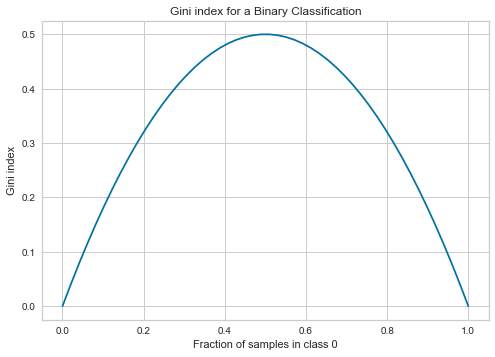

In [229]:
# Gini index
C0 = np.linspace(0,1)
C1 = 1.0 - C0

gini = 1 - C0**2 - C1**2

plt.plot(C0, gini)
plt.title('Gini index for a Binary Classification')
plt.xlabel('Fraction of samples in class 0')
plt.ylabel('Gini index')
plt.savefig('ginirf.png')

In [230]:
X

,0,1,2,3,4,5,6,7,8,9,...,82,83,84,85,86,87,88,89,90,91
0,-2.217909,-2.045798,-2.400361,-0.383334,-0.382638,0.016456,-0.023516,-0.020165,-0.087479,-0.031281,...,2.812493,-2.254317,-0.049491,-0.084274,-0.383465,-0.861611,0.680171,-0.060031,-0.098978,-0.622067
1,-0.673828,-0.311068,-0.598450,0.135068,0.136307,0.014671,0.014799,0.015966,-0.005957,0.009823,...,0.527485,-0.309033,-0.049491,-0.021388,0.135253,-0.029804,0.240685,15.129816,0.364559,-0.535573
2,-1.303672,-0.908420,-1.319910,-0.383759,-0.388177,0.007858,-0.061111,-0.051183,-0.142238,-0.086566,...,-0.199721,-0.820510,-0.049491,-0.005984,-0.383698,-0.249820,0.679247,-0.062961,-0.125015,-0.621960
3,-1.735886,-1.636209,-1.556340,-1.441418,-1.441832,-0.004257,-0.017313,-0.008676,-0.024491,-0.011077,...,1.158899,-1.691222,-0.049491,-0.080226,-1.441526,-0.392864,0.093765,-0.053903,-0.052562,-0.471826
4,-0.661778,-0.307745,-0.508050,-0.541238,-0.540708,0.016758,0.013703,0.016186,-0.013254,0.013300,...,0.525867,-0.316008,-0.049491,-0.032052,-0.541255,-0.029564,-0.128014,-0.178037,0.776395,-0.241715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,-0.189395,-0.291959,-0.168181,-0.206277,-0.204969,0.018215,0.017036,0.018197,-0.010092,0.016277,...,-0.115286,-0.194231,-0.049491,-0.024011,-0.206217,-0.002968,-0.052524,-0.030437,0.063215,-0.353693
6815,-0.494676,-0.310237,-0.477627,-0.569328,-0.568828,0.018223,0.017455,0.017919,-0.009248,0.016145,...,-0.001180,-0.198659,-0.049491,0.001317,-0.569333,-0.006633,-0.154404,-0.033992,0.049970,-0.185856
6816,-0.534845,-0.379194,-0.534996,0.147411,0.135029,0.017628,0.016412,0.017153,-0.009919,0.013012,...,-0.776979,-0.247517,-0.049491,0.019653,0.147305,-0.018166,-0.316446,-0.047870,-0.015101,1.001206
6817,0.017875,0.019594,0.007403,-0.005811,-0.004720,0.024494,0.024099,0.023223,-0.011175,0.022233,...,-0.278510,0.100366,-0.049491,0.003493,-0.005931,0.046934,-0.194852,-0.045898,-0.004270,-0.071364


# K-MEANS ALGORITHM

[0.11167795 0.11600124 0.1416502  0.11829332 0.06446668 0.0708459
 0.06853466 0.05381674 0.07111438 0.06511352 0.02898067]


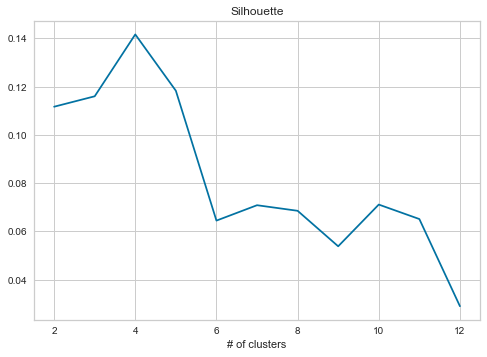

<Figure size 576x396 with 0 Axes>

In [244]:
#library for score evaluation
from sklearn import metrics
from sklearn import cluster
#use of "silhouette" metric
#vary the number of clusters from 2 to 12
res = np.arange(11,dtype="double")
for k in np.arange(11):
    km = cluster.KMeans(n_clusters=k+2)
    km.fit(X)
    res[k] = metrics.silhouette_score(X,km.labels_)
print(res)
#visualization
import matplotlib.pyplot as plt
plt.title("Silhouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,13,1),res)
plt.show()
plt.savefig('kmeansk.png')

In [245]:
#ACP
from sklearn.decomposition import PCA
acp=PCA(n_components=3)
rpca=acp.fit_transform(X)

In [246]:
# Save components to a DataFrame
PCA_comp=pd.DataFrame(rpca,columns=['PC1','PC2','PC3'])


In [247]:
PCA_comp.shape

(6819, 3)

In [248]:
#Let's make the regrouping
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(PCA_comp)
cluster=kmeans.labels_
PCA_comp['cluster']=cluster

In [236]:
#Clusters size
(PCA_comp['cluster']==0).sum(),(PCA_comp['cluster']==1).sum(),(PCA_comp['cluster']==2).sum(),(PCA_comp['cluster']==3).sum()

(1649, 1765, 3401, 4)

In [237]:
#Plot our clusters 
import plotly.express as px
fig = px.scatter_3d(PCA_comp, x='PC1', y='PC2',z='PC3', color='cluster')
fig.show()
plt.savefig('cluster.png')

<Figure size 576x396 with 0 Axes>

In [238]:
#Let's make the regrouping with k=8
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8, random_state=0).fit(PCA_comp)
cluster1=kmeans.labels_
PCA_comp['cluster8']=cluster1

In [239]:
#Plot our clusters 
import plotly.express as px
fig = px.scatter_3d(PCA_comp, x='PC1', z='PC2', y='PC3', color='cluster8')

fig.show()
plt.savefig('cluster8.png')

<Figure size 576x396 with 0 Axes>

In [240]:
df["clusters"]=PCA_comp['cluster']

In [241]:
PCA_comp.shape

(6819, 5)

In [242]:
##some statistics of our clusters 
Clust =df.groupby(by='clusters').agg({'_ROA(C)_before_interest_and_depreciation_before_interest':'mean','_Debt_ratio_%':'mean','_Current_Liability_to_Current_Assets':'mean','_Net_Income_to_Total_Assets':'mean'})
Clust=pd.DataFrame(Clust)
Clust


,_ROA(C)_before_interest_and_depreciation_before_interest,_Debt_ratio_%,_Current_Liability_to_Current_Assets,_Net_Income_to_Total_Assets
clusters,,,,
0,0.567865,0.091619,0.020966,0.843162
1,0.455315,0.152842,0.037479,0.776722
2,0.500867,0.102832,0.033431,0.806880
3,0.333021,0.293550,0.104405,0.656909


In [243]:
#some statistics of our clusters grouby banryptcy
temp = df.groupby(by=['Bankrupt?', 'clusters']).agg({'_Debt_ratio_%': 'mean','_Net_Income_to_Total_Assets':'mean'})
temp=pd.DataFrame(temp)
temp

_Debt_ratio_%  _Net_Income_to_Total_Assets
Bankrupt? clusters                                            
0         0              0.091580                     0.843177
          1              0.148912                     0.782147
          2              0.101731                     0.807213
          3              0.292711                     0.761793
1         0              0.156241                     0.819091
          1              0.192823                     0.721550
          2              0.166321                     0.787733
          3              0.293830                     0.621947

# END